# Relationship Between the Generator in GANs and the Probability Distribution of X

The generator in a Generative Adversarial Network (GAN) is a neural network that learns to model the probability distribution of a dataset $X$. Here's how it relates:

1. **Latent Space to Data Space Mapping**:
   - The generator $G$ takes a random noise vector $z$ sampled from a simple latent distribution (e.g., Gaussian or uniform) and transforms it into a data sample $G(z)$.
   - Through training, $G(z)$ is meant to mimic samples drawn from the true data distribution $p_X$.

3. **Training Objective**:
   - GANs train $G$ to produce samples such that the discriminator $D$ cannot distinguish between $G(z)$ and real samples from $p_X$.
   - In theory, when $G$ is optimal, samples from G(Z) converges to $p_X$, meaning the generated samples will follow the same distribution as the real data distribution X.

4. **Relation to $X$'s Distribution**:
   - $G$ doesn’t explicitly estimate $p_X$ (no explicit density function is calculated).
   - Instead, $G$ learns to transform $z$ into a representation such that the resulting samples are indistinguishable from those drawn from $p_X$.

This process uses adversarial training to ensure $p_G$ becomes as close as possible to $p_X$, effectively capturing the probability distribution of the data.

## Invertibility of G

It's worth noting that the generator $G$ in GANs is not necessarily invertible. While the generator learns to map noise to data samples, this mapping may not be reversible. This is in contrast to autoencoders, where the encoder-decoder architecture ensures a bijective mapping between the input and output spaces.

If G is invertible, then the density of X can be expressed as:

$$
p_X(x) = p_z(G^{-1}(x)) \left| \text{det} \left( \frac{\partial G^{-1}(x)}{\partial x} \right) \right|
$$

However, in practice, the generator in GANs is often not designed to be invertible, and the focus is on generating realistic samples rather than ensuring invertibility.

When we get to invertible GANs (iGANs), the generator is designed to be invertible, allowing for more direct control over the latent space and the generated samples.

Once the training changes to MLE, an invertible GAN is very similar to normalizing flows, where the generator is a flow-based model that learns a bijective mapping between the latent and data spaces.

## Generators and Probability Distributions


Not just GANs, but for other classes of models as well, the generator is often used to model the probability distribution of the data. For instance:

- In Variational Autoencoders (VAEs), the decoder (generator) learns to model the conditional distribution $p(x|z)$, which can be used to generate samples.

- In autoregressive models, the generator learns the factorized distribution $p(x) = \prod_i p(x_i | x_{<i})$.

- In flow-based models, the generator learns a bijective mapping between the latent and data spaces, allowing for exact density estimation.

In all these cases, the generator plays a crucial role in capturing the underlying probability distribution of the data, enabling the generation of realistic samples.


## Relationship Between Generator $G$ and $X$ 



The generator implicitly defines a probability distribution $p_G$ over the data space by mapping the noise distribution $p_z$ via $G$. This is:

$$
p_X(x) = \int_z p_G(z | G(z) = x)dz =  \int_z p_z(z) \delta(x - G(z)) dz
$$

where $\delta$ is the Dirac delta function, representing a deterministic mapping.

### 1. Definitions and Notation

1. **Spaces**:
   - $ \Omega_Z \subseteq \mathbb{R}^{m_1} $: Sample space for $ Z $, the noise distribution.
   - $ \Omega_X \subseteq \mathbb{R}^{m_2} $: Sample space for $ X $, the induced data distribution.

2. **Generator Mapping**:
   - $ G: \Omega_Z \to \Omega_X $ is a differentiable function that maps noise $ Z $ to the data space $ X $:
     $$
     X = G(Z)
     $$

3. **Distributions**:
   - $ p_Z(z) $: PDF of $ Z $ on $ \Omega_Z $.
   - $ p_X(x) $: PDF of $ X $ on $ \Omega_X $.

---

### 2. Change of Variables Formula

The relationship between $p_Z(z)$ and $p_X(x)$ comes from the **change of variables formula for probability densities**.

1. **Mapping Probabilities**:
   The probability of $X$ being in an infinitesimal volume $ dx $ around $x$ is equal to the probability of $ Z $ being in the corresponding preimage volume $ dz $ under $G^{-1}$:

$$
\begin{align}
&\Pr(X \in [x, x + dx]) \\
&= \Pr(G(Z) \in [x, x + dx]) \\
 &= \Pr\left(
Z \in [z, z + dz] \middle|
\mathrm{vol}(dx) = \mathrm{vol}\big(dz : G^{-1}(x) = z \big) \right) \\
\end{align}
$$

   which is the same as saying:

   $$
   \Pr(X \in dx) = p_X(x)dx = Vol(G(z)) \cdot  p_Z(z)dz  
   $$


   where $dz$ is the volume element in $ \Omega_Z $.

2. **Volume Transformation**:
   Under the mapping $ G: Z \to X $, the preimage volume $ dz $ is related to $ dx $ via the determinant of the Jacobian matrix $ J_{G(z)} $, which measures the local transformation of volumes:
   $$
   dx =  \left| \det J_{G(z)} \right| \cdot dz
   $$
   where $ J_{G(z)} \in \mathbb{R}^{m_2 \times m_1} $ is the Jacobian matrix of $ G $ with:
   $$
   [J_{G(z)}]_{ij} = \frac{\partial G_i(z)}{\partial z_j}
   $$

   So we have an approximation for local volume around dx in terms of G and dz. 

3. **Relating PDFs**:

   Substituting $ dx $ in terms of $ dz $ and the Jacobian of G(z), we get:
   $$
   p_X(x)  \left| \det J_{G(z)} \right| dz = p_Z(z) dz
   $$

   Which simplifies to:

   $$
   p_X(x) = p_Z(z) \left| \det J_{G(z)} \right|^{-1}
   $$

   where $ z = G^{-1}(x) $.



---

### 3. Jacobian and Determinant

Writing 

$$G = [G_1, G_2, ..., G_{m_2}]^T$$

where $G_i: \mathbb{R}^{m_1} \to \mathbb{R}$ are the components of $G$.

1. **Jacobian Matrix**:
   The Jacobian matrix $ J_{G(z)} \in \mathbb{R}^{m_2 \times m_1} $ describes how $ G $ transforms the coordinates of $ Z $ into those of $ X $:
   $$
   J_{G(z)} = \begin{bmatrix}
   \frac{\partial G_1}{\partial z_1} & \cdots & \frac{\partial G_1}{\partial z_{m_1}} \\
   \vdots & \ddots & \vdots \\
   \frac{\partial G_{m_2}}{\partial z_1} & \cdots & \frac{\partial G_{m_2}}{\partial z_{m_1}}
   \end{bmatrix}
   $$

with $\nabla$, this can be written as:


$$
J_{G(z)} = \begin{bmatrix}
\nabla G_1(z)^T \\
\vdots \\
\nabla G_{m_2}(z)^T
\end{bmatrix}
$$


2. **Determinant**:
   - If $ m_1 = m_2 $, $ \det J_{G(z)} $ measures how $ G $ locally scales volumes around $ z $.
   - If $ m_1 \neq m_2 $, $ J_{G(z)} $ is rectangular, and we use the **generalized determinant (Jacobian determinant)** for non-square matrices.

---

### 4. Final Result

For $ Z \in \mathbb{R}^{m_1} $ and $ X \in \mathbb{R}^{m_2} $, the induced PDF of $ X $ under the generator $ G: \mathbb{R}^{m_1} \to \mathbb{R}^{m_2} $ is:
$$
p_X(x) = p_Z(z) \left| \det J_{G(z)} \right|^{-1}, \quad z = G^{-1}(x).
$$

This formula captures how $ G $ transforms both the density and the geometry of the sample space.


### Example  Generator: Inverse CDF method for Exponential

Jacobian of the transformation: 1/(u + 1)
Transformation: x = log(u + 1)
Inverse Transformation: u = exp(x) - 1
Density of U: p_U = 1
Density of X: p_X = u + 1


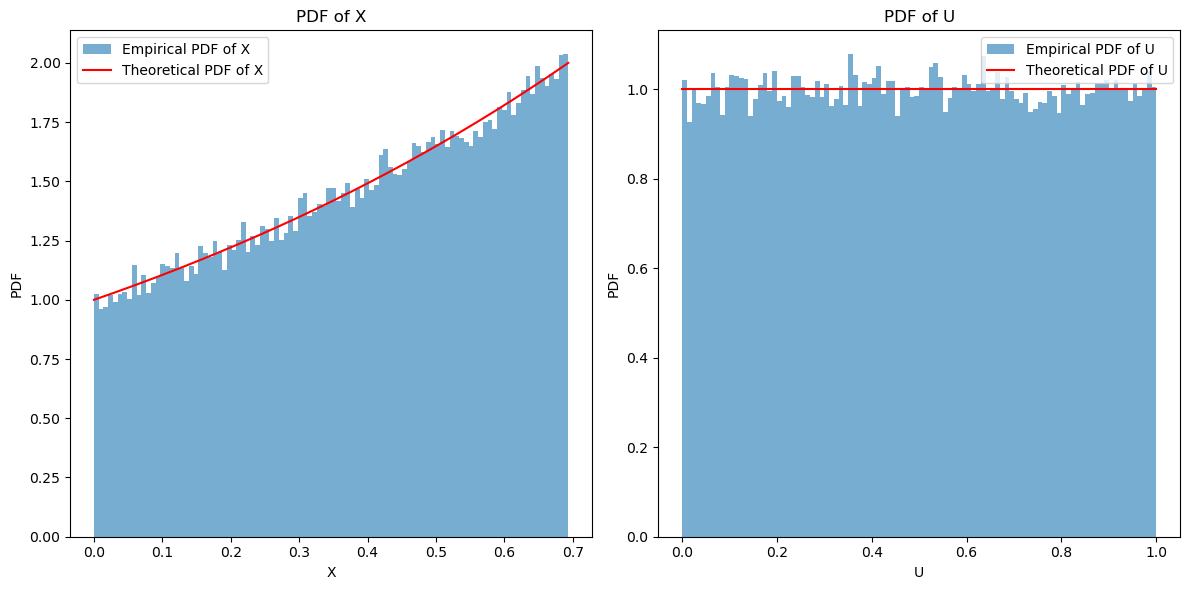

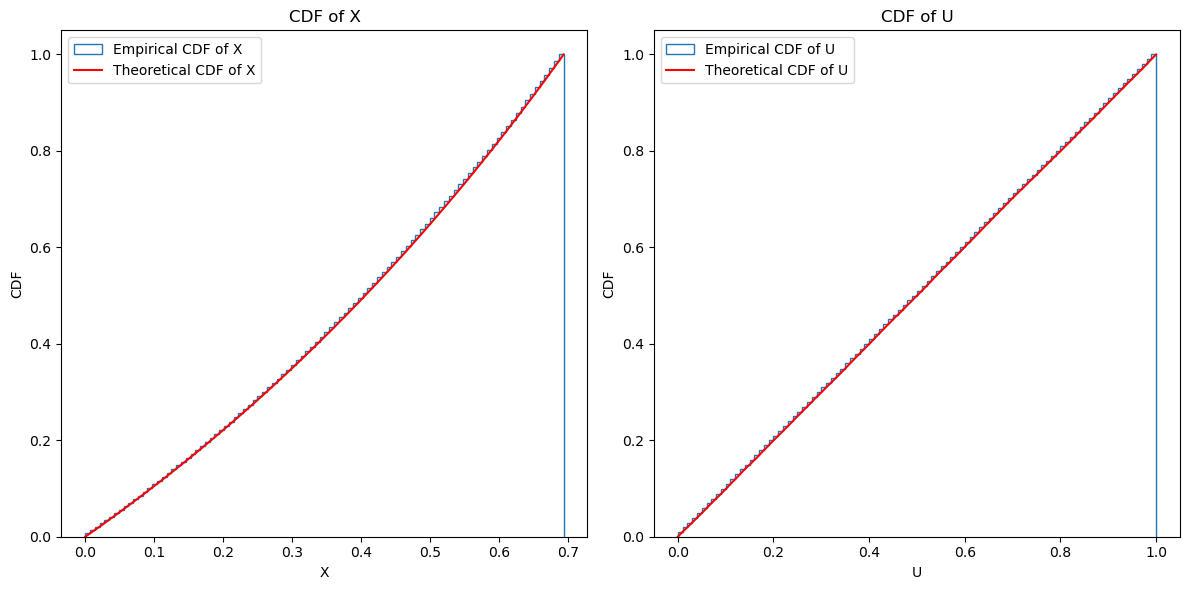

In [35]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Define the symbols
u, x = sp.symbols('u x')

# Define the transformation and its inverse
transformation = sp.log(u + 1)
inverse_transformation = sp.exp(x) - 1

# Define the probability density functions
p_U = 1  # Uniform distribution on [0, 1]
jacobian = sp.diff(transformation, u)
print(f"Jacobian of the transformation: {jacobian}")
p_X_calculated = p_U / jacobian

# Simplify the density function for X
p_X_simplified = sp.simplify(p_X_calculated)

# Print the transformation and its inverse
print(f"Transformation: x = log(u + 1)")
print(f"Inverse Transformation: u = exp(x) - 1")

# Print the density functions
print(f"Density of U: p_U = {p_U}")
print(f"Density of X: p_X = {p_X_simplified}")

n_samples = 100000
# Generate random samples from the uniform distribution
U_samples = np.random.uniform(0, 1, n_samples)

# Apply the transformation to get samples from the exponential distribution
X_samples = np.log(U_samples + 1)

# Create a range of values for plotting the theoretical density of X
x_vals = np.linspace(0, np.log(2), 1000)  # Theoretical range for X
p_X_vals = np.exp(x_vals) # Theoretical PDF of X

# Plot the empirical and theoretical PDFs of the transformed samples
plt.figure(figsize=(12, 6))

# Empirical PDF of the transformed samples
plt.subplot(1, 2, 1)
plt.hist(X_samples, bins=100, density=True, alpha=0.6, label='Empirical PDF of X')
plt.plot(x_vals, p_X_vals, label='Theoretical PDF of X', color='r')
plt.title('PDF of X')
plt.xlabel('X')
plt.ylabel('PDF')
plt.legend()

# Empirical PDF of the original samples (Uniform distribution)
plt.subplot(1, 2, 2)
plt.hist(U_samples, bins=100, density=True, alpha=0.6, label='Empirical PDF of U')
plt.plot(np.linspace(0, 1, 1000), np.ones(1000), label='Theoretical PDF of U', color='r')
plt.title('PDF of U')
plt.xlabel('U')
plt.ylabel('PDF')
plt.legend()

plt.tight_layout()
plt.show()

# Plot the empirical and theoretical CDFs of the transformed samples
plt.figure(figsize=(12, 6))

# Empirical CDF of the transformed samples
plt.subplot(1, 2, 1)
plt.hist(X_samples, bins=100, density=True, cumulative=True, histtype='step', label='Empirical CDF of X')
plt.title('CDF of X')
plt.plot(np.sort(X_samples), np.exp(np.sort(X_samples))-1, label='Theoretical CDF of X', color='r')
plt.xlabel('X')
plt.ylabel('CDF')
plt.legend()

# Empirical CDF of the original samples (Uniform distribution)
plt.subplot(1, 2, 2)
plt.hist(U_samples, bins=100, density=True, cumulative=True, histtype='step', label='Empirical CDF of U')
plt.plot(np.sort(U_samples), np.linspace(0, 1, len(U_samples), endpoint=False), label='Theoretical CDF of U', color='r')
plt.title('CDF of U')
plt.xlabel('U')
plt.ylabel('CDF')
plt.legend()

plt.tight_layout()
plt.show()